In [1]:
#Download packages
!pip install pandas matplotlib scipy

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.5 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.5 MB 5.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.5 MB 4.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.5 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 4.5/11.5 MB 4.3 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.5 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 6.0/11.5 MB 4.1 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.5 MB 4.1 MB/s eta 0:00:02
   -------------------------- ------------- 7.6/11.5 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 4.1 MB/s eta 0:00:01
   ------------------------------- -------- 9.2/11.5 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 4.0 MB/s eta 0:00:01
   --

In [14]:
!pip install seaborn

# PLOTTING GRAPHS

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\sreey\OneDrive\Desktop\Simulator_readings.csv')

# Convertion of time from milliseconds to seconds for easier plotting
df['Time (s)'] = df['Time(ms)'] / 1000

## PLOT FOR FHR vs TIME

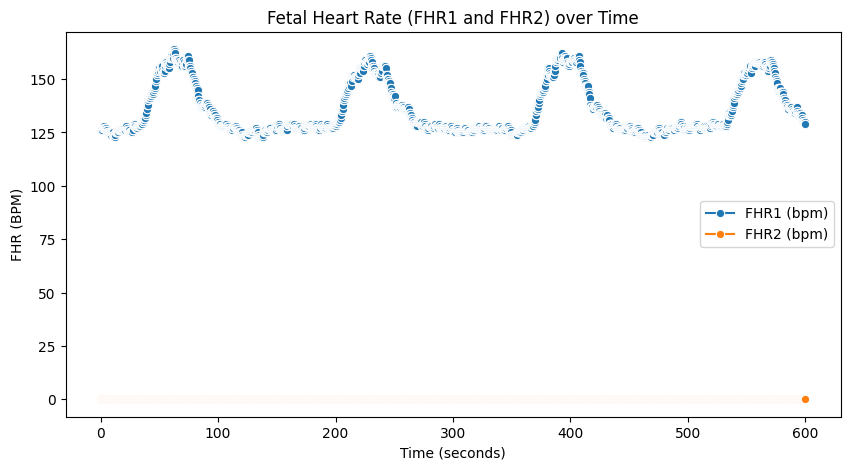

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Time (s)', y='Fhr1(BPM)', data=df, label="FHR1 (bpm)", marker='o')
sns.lineplot(x='Time (s)', y='Fhr2(BPM)', data=df, label="FHR2 (bpm)", marker='o')
plt.title("Fetal Heart Rate (FHR1 and FHR2) over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("FHR (BPM)")
plt.legend()
plt.show()

## PLOT FOR UC vs TIME

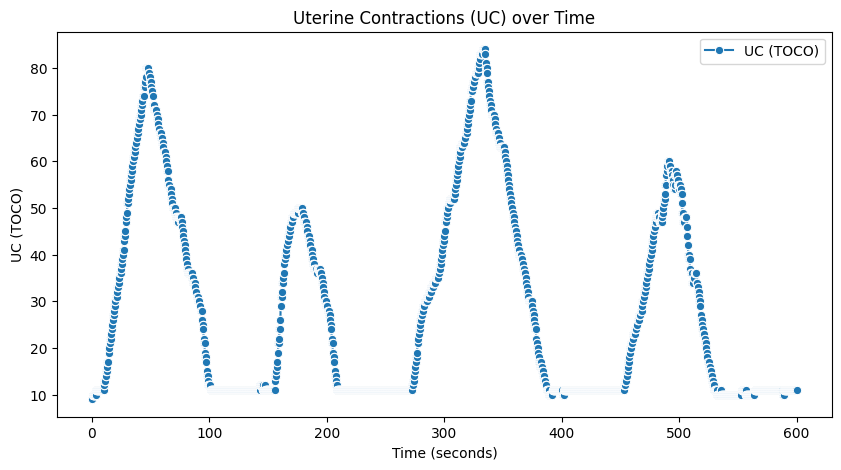

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Time (s)', y='Uc(TOCO)', data=df, label="UC (TOCO)", marker='o')
plt.title("Uterine Contractions (UC) over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("UC (TOCO)")
plt.legend()
plt.show()

# FHR ANALYSIS

In [19]:
import numpy as np

# Setting of time interval for each epoch (3.75 seconds = 3750 milliseconds)
epoch_duration_ms = 3750
epochs_per_minute = int(60 / (epoch_duration_ms / 1000))

#Average FHR for each epoch
df['Epoch'] = (df['Time(ms)'] // epoch_duration_ms).astype(int)

#Average BPM and Pulse Interval for each epoch
fhr_analysis = df.groupby('Epoch').agg(
    Avg_FHR1=('Fhr1(BPM)', 'mean'),
    Avg_FHR2=('Fhr2(BPM)', 'mean')
).reset_index()

#pulse interval = 60,000 / BPM
fhr_analysis['Pulse_Interval_FHR1(ms)'] = 60000 / fhr_analysis['Avg_FHR1']
fhr_analysis['Pulse_Interval_FHR2(ms)'] = 60000 / fhr_analysis['Avg_FHR2']

print(fhr_analysis)

     Epoch    Avg_FHR1  Avg_FHR2  Pulse_Interval_FHR1(ms)  \
0        0  126.714286       0.0               473.506201   
1        1  125.800000       0.0               476.947536   
2        2  124.600000       0.0               481.540931   
3        3  124.333333       0.0               482.573727   
4        4  125.933333       0.0               476.442562   
..     ...         ...       ...                      ...   
156    156  136.666667       0.0               439.024390   
157    157  134.866667       0.0               444.883836   
158    158  133.800000       0.0               448.430493   
159    159  131.133333       0.0               457.549568   
160    160  129.000000       0.0               465.116279   

     Pulse_Interval_FHR2(ms)  
0                        inf  
1                        inf  
2                        inf  
3                        inf  
4                        inf  
..                       ...  
156                      inf  
157                

# UC peak detection

In [20]:
from scipy.signal import find_peaks

# Peak detection for UC data
uc_data = df['Uc(TOCO)'].values

# peak detection
peaks, properties = find_peaks(uc_data, height=0)  # You can adjust 'height' threshold
peak_heights = properties['peak_heights']

# Find peak widths at half the maximum height
from scipy.signal import peak_widths
widths = peak_widths(uc_data, peaks, rel_height=0.5)[0]  # Width at half maximum height

# Filter peaks with width > 30 seconds (120 time steps since data is at 250ms intervals)
wide_peaks = widths[widths > 30 * 4]  # 30 seconds = 120 samples (250ms interval)

# average duration of wide peaks
avg_peak_duration = wide_peaks.mean() if len(wide_peaks) > 0 else None

print(f"Number of peaks wider than 30 seconds: {len(wide_peaks)}")
print(f"Average duration of peaks wider than 30 seconds: {avg_peak_duration} samples")


Number of peaks wider than 30 seconds: 4
Average duration of peaks wider than 30 seconds: 181.375 samples
